Episode 1, Reward: 15.0, Avg Reward (Last 50): 15.00
Episode 2, Reward: 17.0, Avg Reward (Last 50): 16.00
Episode 3, Reward: 9.0, Avg Reward (Last 50): 13.67
Episode 4, Reward: 21.0, Avg Reward (Last 50): 15.50
Episode 5, Reward: 12.0, Avg Reward (Last 50): 14.80
Episode 6, Reward: 13.0, Avg Reward (Last 50): 14.50
Episode 7, Reward: 50.0, Avg Reward (Last 50): 19.57
Episode 8, Reward: 18.0, Avg Reward (Last 50): 19.38
Episode 9, Reward: 23.0, Avg Reward (Last 50): 19.78
Episode 10, Reward: 33.0, Avg Reward (Last 50): 21.10
Episode 11, Reward: 11.0, Avg Reward (Last 50): 20.18
Episode 12, Reward: 14.0, Avg Reward (Last 50): 19.67
Episode 13, Reward: 19.0, Avg Reward (Last 50): 19.62
Episode 14, Reward: 10.0, Avg Reward (Last 50): 18.93
Episode 15, Reward: 17.0, Avg Reward (Last 50): 18.80
Episode 16, Reward: 21.0, Avg Reward (Last 50): 18.94
Episode 17, Reward: 17.0, Avg Reward (Last 50): 18.82
Episode 18, Reward: 28.0, Avg Reward (Last 50): 19.33
Episode 19, Reward: 29.0, Avg Reward (

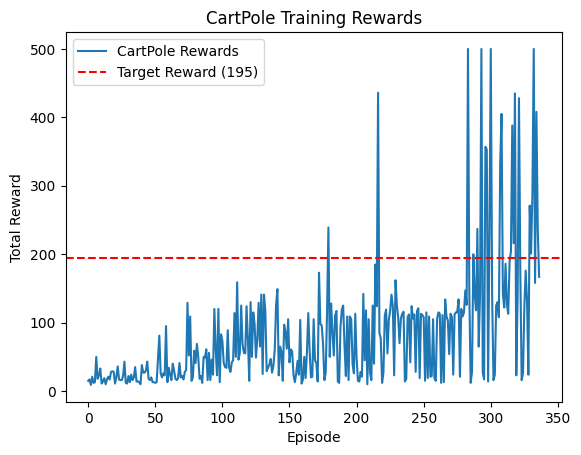

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/cartpole_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


CartPole video saved.


In [7]:
# Best CartPole-v1 Performance


! pip install gymnasium

import gymnasium as gym
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the DQN Model
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return np.array(states), actions, rewards, np.array(next_states), dones

    def __len__(self):
        return len(self.buffer)

# Training and Evaluation Functions
def select_action(state, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()
    state = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        return model(state).argmax(1).item()

def train_dqn():
    if len(replay_buffer) < batch_size:
        return

    states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions).unsqueeze(1)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    dones = torch.FloatTensor(dones)

    q_values = model(states).gather(1, actions).squeeze(1)
    next_q_values = target_model(next_states).max(1)[0]
    expected_q_values = rewards + gamma * next_q_values * (1 - dones)

    loss = nn.MSELoss()(q_values, expected_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Environment Setup
env = gym.make("CartPole-v1", render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Hyperparameters
gamma = 0.99
learning_rate = 1e-3
buffer_capacity = 10000
batch_size = 64
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
target_update_freq = 10
max_episodes = 500
max_steps = 1000
reward_threshold = 195

# Initialize Models, Replay Buffer, and Optimizer
model = DQN(state_dim, action_dim)
target_model = DQN(state_dim, action_dim)
target_model.load_state_dict(model.state_dict())
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
replay_buffer = ReplayBuffer(buffer_capacity)

# Training Loop
episode_rewards = []
epsilon = epsilon_start

for episode in range(max_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = select_action(state, epsilon)
        next_state, reward, done, truncated, _ = env.step(action)
        replay_buffer.push(state, action, reward, next_state, done or truncated)
        state = next_state
        total_reward += reward

        train_dqn()
        if done or truncated:
            break

    episode_rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_end)

    # Update Target Model
    if episode % target_update_freq == 0:
        target_model.load_state_dict(model.state_dict())

    # Print Progress
    avg_reward = np.mean(episode_rewards[-50:])
    print(f"Episode {episode + 1}, Reward: {total_reward}, Avg Reward (Last 50): {avg_reward:.2f}")

    if avg_reward >= reward_threshold:
        print("Solved CartPole!")
        break

# Plot Training Rewards
plt.plot(episode_rewards, label="CartPole Rewards")
plt.axhline(y=reward_threshold, color="r", linestyle="--", label="Target Reward (195)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.title("CartPole Training Rewards")
plt.show()

# Generate Longer Video of the Agent
from gymnasium.wrappers import RecordVideo
video_env = RecordVideo(env, "cartpole_videos/", episode_trigger=lambda e: True)
state, _ = video_env.reset()
for _ in range(max_steps):
    action = select_action(state, epsilon=0.01)
    state, _, done, _, _ = video_env.step(action)
    if done:
        break
video_env.close()
print("CartPole video saved.")


Episode 1, Reward: -153.8237178726365, Avg Reward (Last 50): -153.82
Episode 2, Reward: 0.7387663273933782, Avg Reward (Last 50): -76.54
Episode 3, Reward: -84.42706071366828, Avg Reward (Last 50): -79.17
Episode 4, Reward: -119.9052401026633, Avg Reward (Last 50): -89.35
Episode 5, Reward: -65.51915618389623, Avg Reward (Last 50): -84.59
Episode 6, Reward: -168.41250700471045, Avg Reward (Last 50): -98.56
Episode 7, Reward: -371.1749709011328, Avg Reward (Last 50): -137.50
Episode 8, Reward: -274.74701958904393, Avg Reward (Last 50): -154.66
Episode 9, Reward: -89.15362057199953, Avg Reward (Last 50): -147.38
Episode 10, Reward: -346.1669375503893, Avg Reward (Last 50): -167.26
Episode 11, Reward: -129.16279041359843, Avg Reward (Last 50): -163.80
Episode 12, Reward: -128.0484466832966, Avg Reward (Last 50): -160.82
Episode 13, Reward: -130.9640140909171, Avg Reward (Last 50): -158.52
Episode 14, Reward: -92.90384578827823, Avg Reward (Last 50): -153.83
Episode 15, Reward: -209.713307

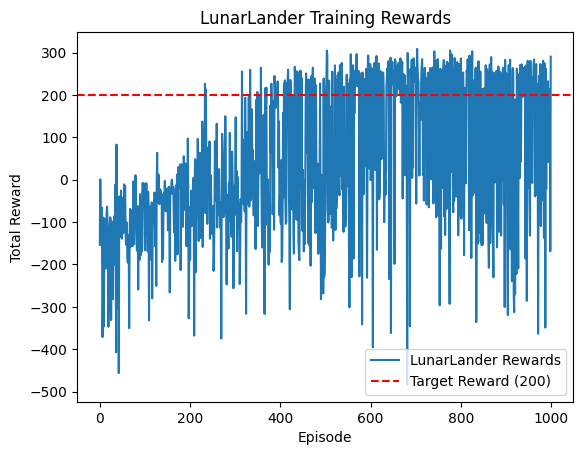

LunarLander video saved.


In [5]:
# Best LunarLander-V3 Performance


!pip install swig
!pip install "gymnasium[box2d]"

import gymnasium as gym
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the DQN Model
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return np.array(states), actions, rewards, np.array(next_states), dones

    def __len__(self):
        return len(self.buffer)

# Training and Evaluation Functions
def select_action(state, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()
    state = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        return model(state).argmax(1).item()

def train_dqn():
    if len(replay_buffer) < batch_size:
        return

    states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions).unsqueeze(1)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    dones = torch.FloatTensor(dones)

    q_values = model(states).gather(1, actions).squeeze(1)
    next_q_values = target_model(next_states).max(1)[0]
    expected_q_values = rewards + gamma * next_q_values * (1 - dones)

    loss = nn.MSELoss()(q_values, expected_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Environment Setup
env = gym.make("LunarLander-v3", render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Hyperparameters
gamma = 0.99
learning_rate = 1e-3
buffer_capacity = 10000
batch_size = 64
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
target_update_freq = 10
max_episodes = 1000
max_steps = 1000
reward_threshold = 200

# Initialize Models, Replay Buffer, and Optimizer
model = DQN(state_dim, action_dim)
target_model = DQN(state_dim, action_dim)
target_model.load_state_dict(model.state_dict())
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
replay_buffer = ReplayBuffer(buffer_capacity)

# Training Loop
episode_rewards = []
epsilon = epsilon_start

for episode in range(max_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = select_action(state, epsilon)
        next_state, reward, done, truncated, _ = env.step(action)
        replay_buffer.push(state, action, reward, next_state, done or truncated)
        state = next_state
        total_reward += reward

        train_dqn()
        if done or truncated:
            break

    episode_rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_end)

    # Update Target Model
    if episode % target_update_freq == 0:
        target_model.load_state_dict(model.state_dict())

    # Print Progress
    avg_reward = np.mean(episode_rewards[-50:])
    print(f"Episode {episode + 1}, Reward: {total_reward}, Avg Reward (Last 50): {avg_reward:.2f}")

    if avg_reward >= reward_threshold:
        print("Solved LunarLander!")
        break

# Plot Training Rewards
plt.plot(episode_rewards, label="LunarLander Rewards")
plt.axhline(y=reward_threshold, color="r", linestyle="--", label="Target Reward (200)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.title("LunarLander Training Rewards")
plt.show()

# Generate Video of the Agent
from gymnasium.wrappers import RecordVideo
video_env = RecordVideo(env, "lunarlander_videos/", episode_trigger=lambda e: True)
state, _ = video_env.reset()
for _ in range(max_steps):
    action = select_action(state, epsilon=0.01)
    state, _, done, _, _ = video_env.step(action)
    if done:
        break
video_env.close()
print("LunarLander video saved.")
